In [1]:
from models import SEAsiaCFR
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
simulations = 20000

In [3]:
self = SEAsiaCFR()

In [4]:
# get DATA
naturalgas = self.get_natural_gas
gdp = self.get_gdp
eurusd = self.get_eurusd
fertprod = self.get_total_fertilizer_production
seasia_cfr = self.get_SEAsiaCFR

dm = self.monthly_dummy()
const = self.const

In [5]:
# len(fao.dropna())
# len(eurusd.dropna())
# len(fertprod.dropna())
# len(inflation.dropna())
# len(gdp.dropna())
# len(brazil_cfr.dropna())

# LATEST ENTRY ONLY

In [6]:
x = seasia_cfr
x[(x.index.month==self.month) & (x.index.year==self.year)].iloc[-1]

SEAsia    922.000000
std_12    181.473493
Name: 2022-07-01 00:00:00, dtype: float64

In [7]:
# Natural Gas
n = naturalgas[(naturalgas.index.month==self.month) & (naturalgas.index.year==self.year)].iloc[-1]
# GDP (based on current month)
g = gdp[(gdp.index.month==self.month) & (gdp.index.year==self.year)].iloc[-1]
# EURUSD
e = eurusd[(eurusd.index.month==self.month) & (eurusd.index.year==self.year)].iloc[-1]
# FERTILIZER PRODUCTION
fert = fertprod[(fertprod.index.month==self.month) & (fertprod.index.year==self.year)].iloc[-1]
# BRAZIL CFR
s = seasia_cfr.iloc[-1]

In [8]:
seasia_latest_cfr = []
for i in tqdm(range(simulations)):
    ng0m = np.random.triangular(n.NGHHUUS-n.std_6,n.NGHHUUS,n.NGHHUUS+n.std_6)
    g0m = np.random.triangular(g.GDPQXUS-g.std_48,g.GDPQXUS,g.GDPQXUS+g.std_48)
    e0m = np.random.triangular(e['Adj Close']-e.std_3,e['Adj Close'],e['Adj Close']+e.std_3)
    fert0m = np.random.triangular(fert['Total Fertilizer Production']-fert.std_60,fert['Total Fertilizer Production'],fert['Total Fertilizer Production']+fert.std_60)
    s0m = np.random.triangular(s.SEAsia-s.std_12,s.SEAsia,s.SEAsia+s.std_12)
    result =dm + const + self.HHNaturalGasPrice* ng0m + self.USGDP*g0m + self.USDEURO*e0m + self.TotalFertilizerProduction*fert0m + self.SEAsia_1 *s0m
    seasia_latest_cfr.append(result)

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:04<00:00, 4865.23it/s]


In [9]:
pred_df = pd.DataFrame(seasia_latest_cfr,columns=['Predictions'])

In [10]:
pred_df.describe()

,Predictions
count,20000.000000
mean,833.591751
std,70.999811
min,649.582107
25%,782.389794
50%,833.741690
75%,884.011552
max,1018.246155


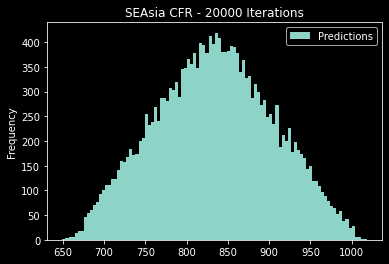

In [11]:
pred_df.plot(kind='hist',bins=100,title=f'SEAsia CFR - {simulations} Iterations');

In [12]:
self.kde_max_density(pred_df)

{'Predictions': 834.2831642363556}